In [1]:
import os
import numpy as np
from MEC import MEC_predict, get_MIDI_features, get_info
import pretty_midi
from IPython import display

_SAMPLING_RATE = 16000

def play_audio(file_path, seconds=30):
  pm = pretty_midi.PrettyMIDI(file_path)
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [2]:
model_path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/MEC_model.h5"
midi_folder_path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/generation/MIDI/polyphonic"

emotion_class = ['Happiness', 'Anger', 'Sadness', 'Calmness']

midi_data_list = []
for emotion in emotion_class:
  emotion_midi_path = os.path.join(midi_folder_path, emotion)
  temp_midi_data_list = get_MIDI_features(emotion_midi_path, 1)
  for midi in temp_midi_data_list:
    midi['emotion'] = emotion
  
  midi_data_list.extend(temp_midi_data_list)


"""
Note Density: How many notes in one beat
Note Length: How long is one note (in beat unit)
Note Velocity: Volume [0, 127]
Pitch: [0, 127]

https://computermusicresource.com/midikeys.html
Scale: [0, 12) -> C, C#, D, D#, E, F, F#, G, G#, A, A#, B
Major: Minor = 0, Major = 1
80% Pitch Range: Middle 80% pitch range
Polyphony: Average Number of pitch per second (1.0 = Mono)
Pitch Entropy: IGNORE
Groove Consistency: Groove consistence or not (hamming distance)
"""

'\nNote Density: How many notes in one beat\nNote Length: How long is one note (in beat unit)\nNote Velocity: Volume [0, 127]\nPitch: [0, 127]\n\nhttps://computermusicresource.com/midikeys.html\nScale: [0, 12) -> C, C#, D, D#, E, F, F#, G, G#, A, A#, B\nMajor: Minor = 0, Major = 1\n80% Pitch Range: Middle 80% pitch range\nPolyphony: Average Number of pitch per second (1.0 = Mono)\nPitch Entropy: IGNORE\nGroove Consistency: Groove consistence or not (hamming distance)\n'

In [3]:
midi_data_list

[{'note_density_avg': 1.5714285714285714,
  'note_density_sd': 1.1473127431577865,
  'note_length_avg': 0.5492563061797755,
  'note_length_sd': 0.5513035698525576,
  'note_velocity_avg': 100.0,
  'note_velocity_sd': 0.0,
  'pitch_avg': 63.61797752808989,
  'pitch_sd': 5.921785370732639,
  'scale': 0.0,
  'major_minor': 1.0,
  '80%_pitch_range': 25.0,
  'polyphony': 1.2852112676056338,
  'pitch_entropy': 3.563120338605886,
  'groove_consistency': 0.9952840909090909,
  'emotion': 'Happiness'},
 {'note_density_avg': 3.6984126984126986,
  'note_density_sd': 0.8287477766480388,
  'note_length_avg': 0.17795970253164606,
  'note_length_sd': 0.01614257077359427,
  'note_velocity_avg': 100.0,
  'note_velocity_sd': 0.0,
  'pitch_avg': 64.48945147679325,
  'pitch_sd': 5.276019960060188,
  'scale': 0.0,
  'major_minor': 1.0,
  '80%_pitch_range': 12.0,
  'polyphony': 1.0257510729613735,
  'pitch_entropy': 3.8347144293123763,
  'groove_consistency': 0.9972582972582973,
  'emotion': 'Happiness'},
 {'

In [20]:
len(midi_data_list)

249

In [4]:
import json

with open("processed_data_info.json", "w") as fp:
  json.dump(midi_data_list, fp) 

# Data Exploration

## Major Minor Scale bar graph

In [5]:
import matplotlib.pyplot as plt

label = ["-C", "-C#", "-D", "-D#", "-E", "-F", "-F#", "-G", "-G#", "-A", "-A#", "-B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
angry = [ 0 for i in range(24) ]
happiness = [ 0 for i in range(24) ]
calmness = [ 0 for i in range(24) ]
sadness = [ 0 for i in range(24) ]

for midi in midi_data_list:
  num = midi['major_minor'] * 12 + midi['scale']
  num = int(num)
  if (midi['emotion'] == 'Anger'):
    angry[num] += 1
  elif (midi['emotion'] == 'Happiness'):
    happiness[num] += 1
  elif (midi['emotion'] == 'Calmness'):
    calmness[num] += 1
  elif (midi['emotion'] == 'Sadness'):
    sadness[num] += 1

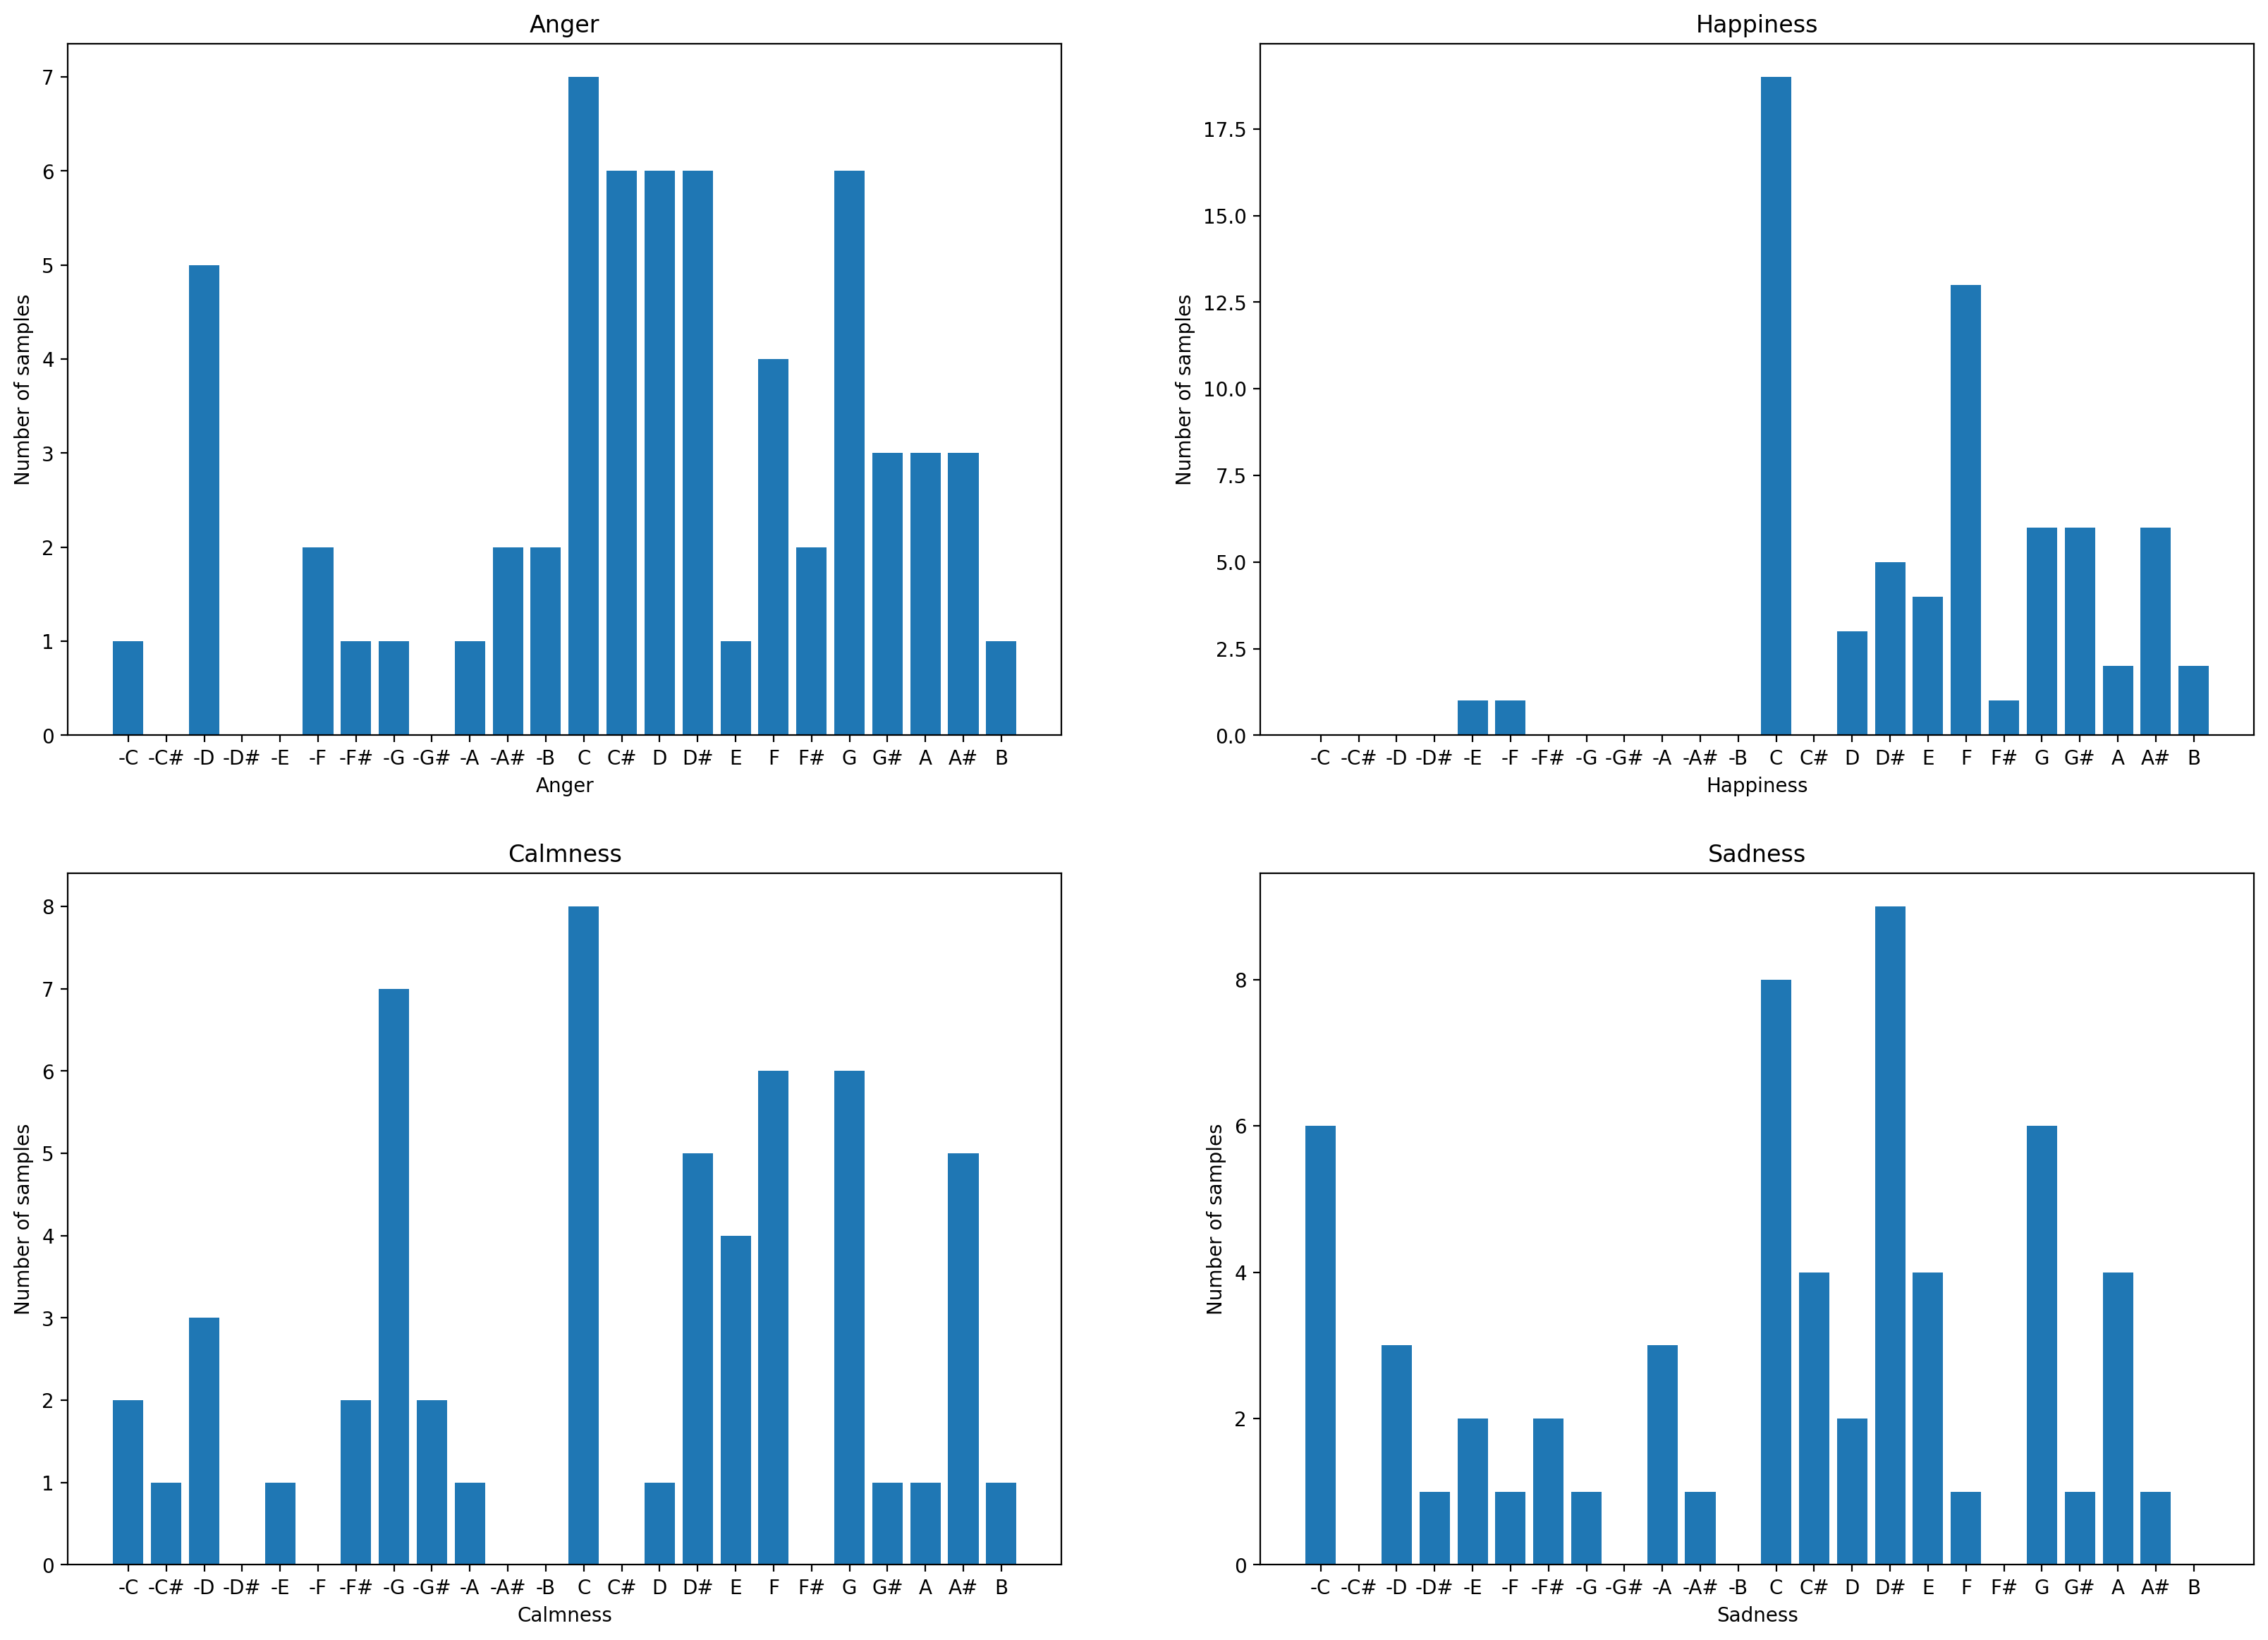

In [6]:

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
axs[0, 0].bar(label, angry)
axs[0, 0].set_xlabel('Anger')
axs[0, 0].set_ylabel('Number of samples')
axs[0, 0].set_title('Anger')

axs[0, 1].bar(label, happiness)
axs[0, 1].set_xlabel('Happiness')
axs[0, 1].set_ylabel('Number of samples')
axs[0, 1].set_title('Happiness')

axs[1, 0].bar(label, calmness)
axs[1, 0].set_xlabel('Calmness')
axs[1, 0].set_ylabel('Number of samples')
axs[1, 0].set_title('Calmness')

axs[1, 1].bar(label, sadness)
axs[1, 1].set_xlabel('Sadness')
axs[1, 1].set_ylabel('Number of samples')
axs[1, 1].set_title('Sadness')
plt.show()

## Plot violin

In [7]:
import matplotlib.pyplot as plt

def box_plot(ax, points, name):
  vp = ax.boxplot(points, positions=[2, 4, 6, 8], widths=1.5, patch_artist=True,
                  showmeans=True, showfliers=False,
                  medianprops={"color": "white", "linewidth": 0.5},
                  boxprops={"facecolor": "C0", "edgecolor": "white",
                            "linewidth": 1.0},
                  whiskerprops={"color": "C0", "linewidth": 1.5},
                  capprops={"color": "C0", "linewidth": 1.5})

  # ax.set_ylim((0, 6))
  ax.set_xticklabels(('Anger', 'Happiness', 'Calmness', 'Sadness'))
  ax.set_title(name)
  ax.set_xlabel('Emotions')
  ax.set_ylabel(name)

  return ax, vp

def violin_plot(ax, points, name):
  vp = ax.violinplot(points, [2, 4, 6, 8], widths=2,
                    showmeans=True, showmedians=True, showextrema=True)
  for body in vp['bodies']:
    body.set_alpha(0.9)

  # ax.set_ylim((0, 6))
  ax.set_xticklabels(('', '',  'Anger', '', 'Happiness', '', 'Calmness', '', 'Sadness'))
  ax.set_title(name)
  ax.set_xlabel('Emotions')
  ax.set_ylabel(name)

  return ax, vp

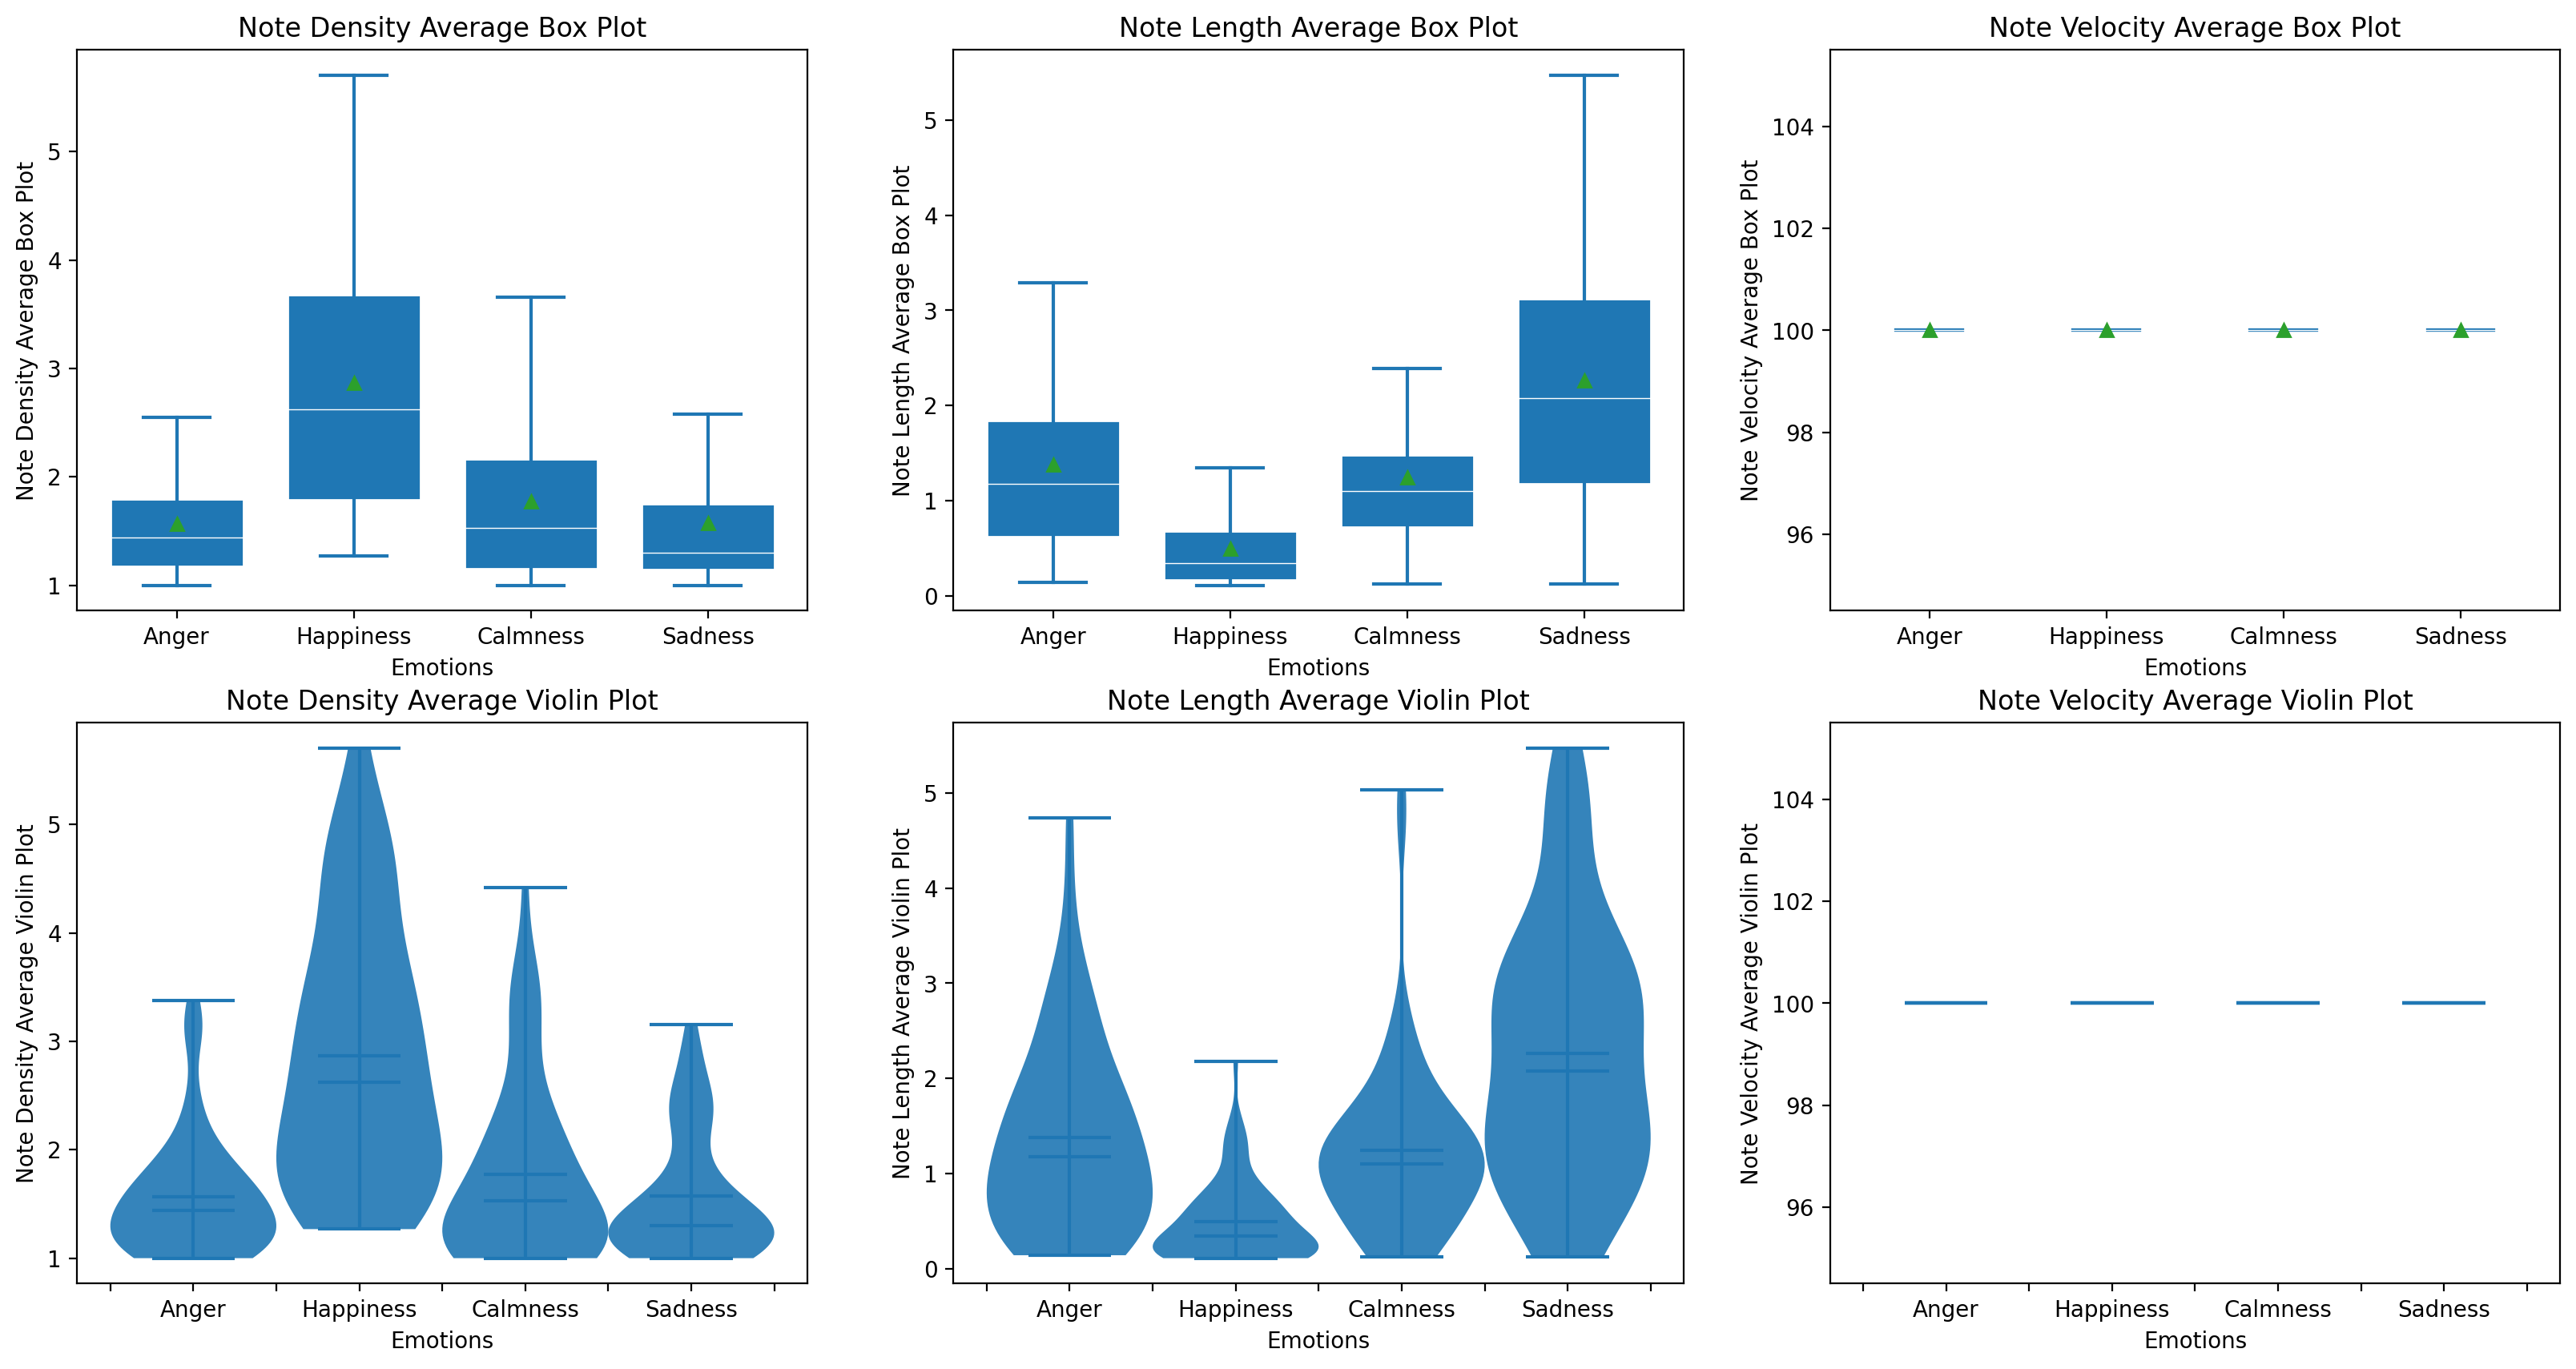

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_density_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 0], vp = box_plot(ax[0, 0], points, 'Note Density Average Box Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_length_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 1], vp = box_plot(ax[0, 1], points, 'Note Length Average Box Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_velocity_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 2], vp = box_plot(ax[0, 2], points, 'Note Velocity Average Box Plot')




# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_density_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 0], vp = violin_plot(ax[1, 0], points, 'Note Density Average Violin Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_length_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 1], vp = violin_plot(ax[1, 1], points, 'Note Length Average Violin Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_velocity_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 2], vp = violin_plot(ax[1, 2], points, 'Note Velocity Average Violin Plot')

plt.show()

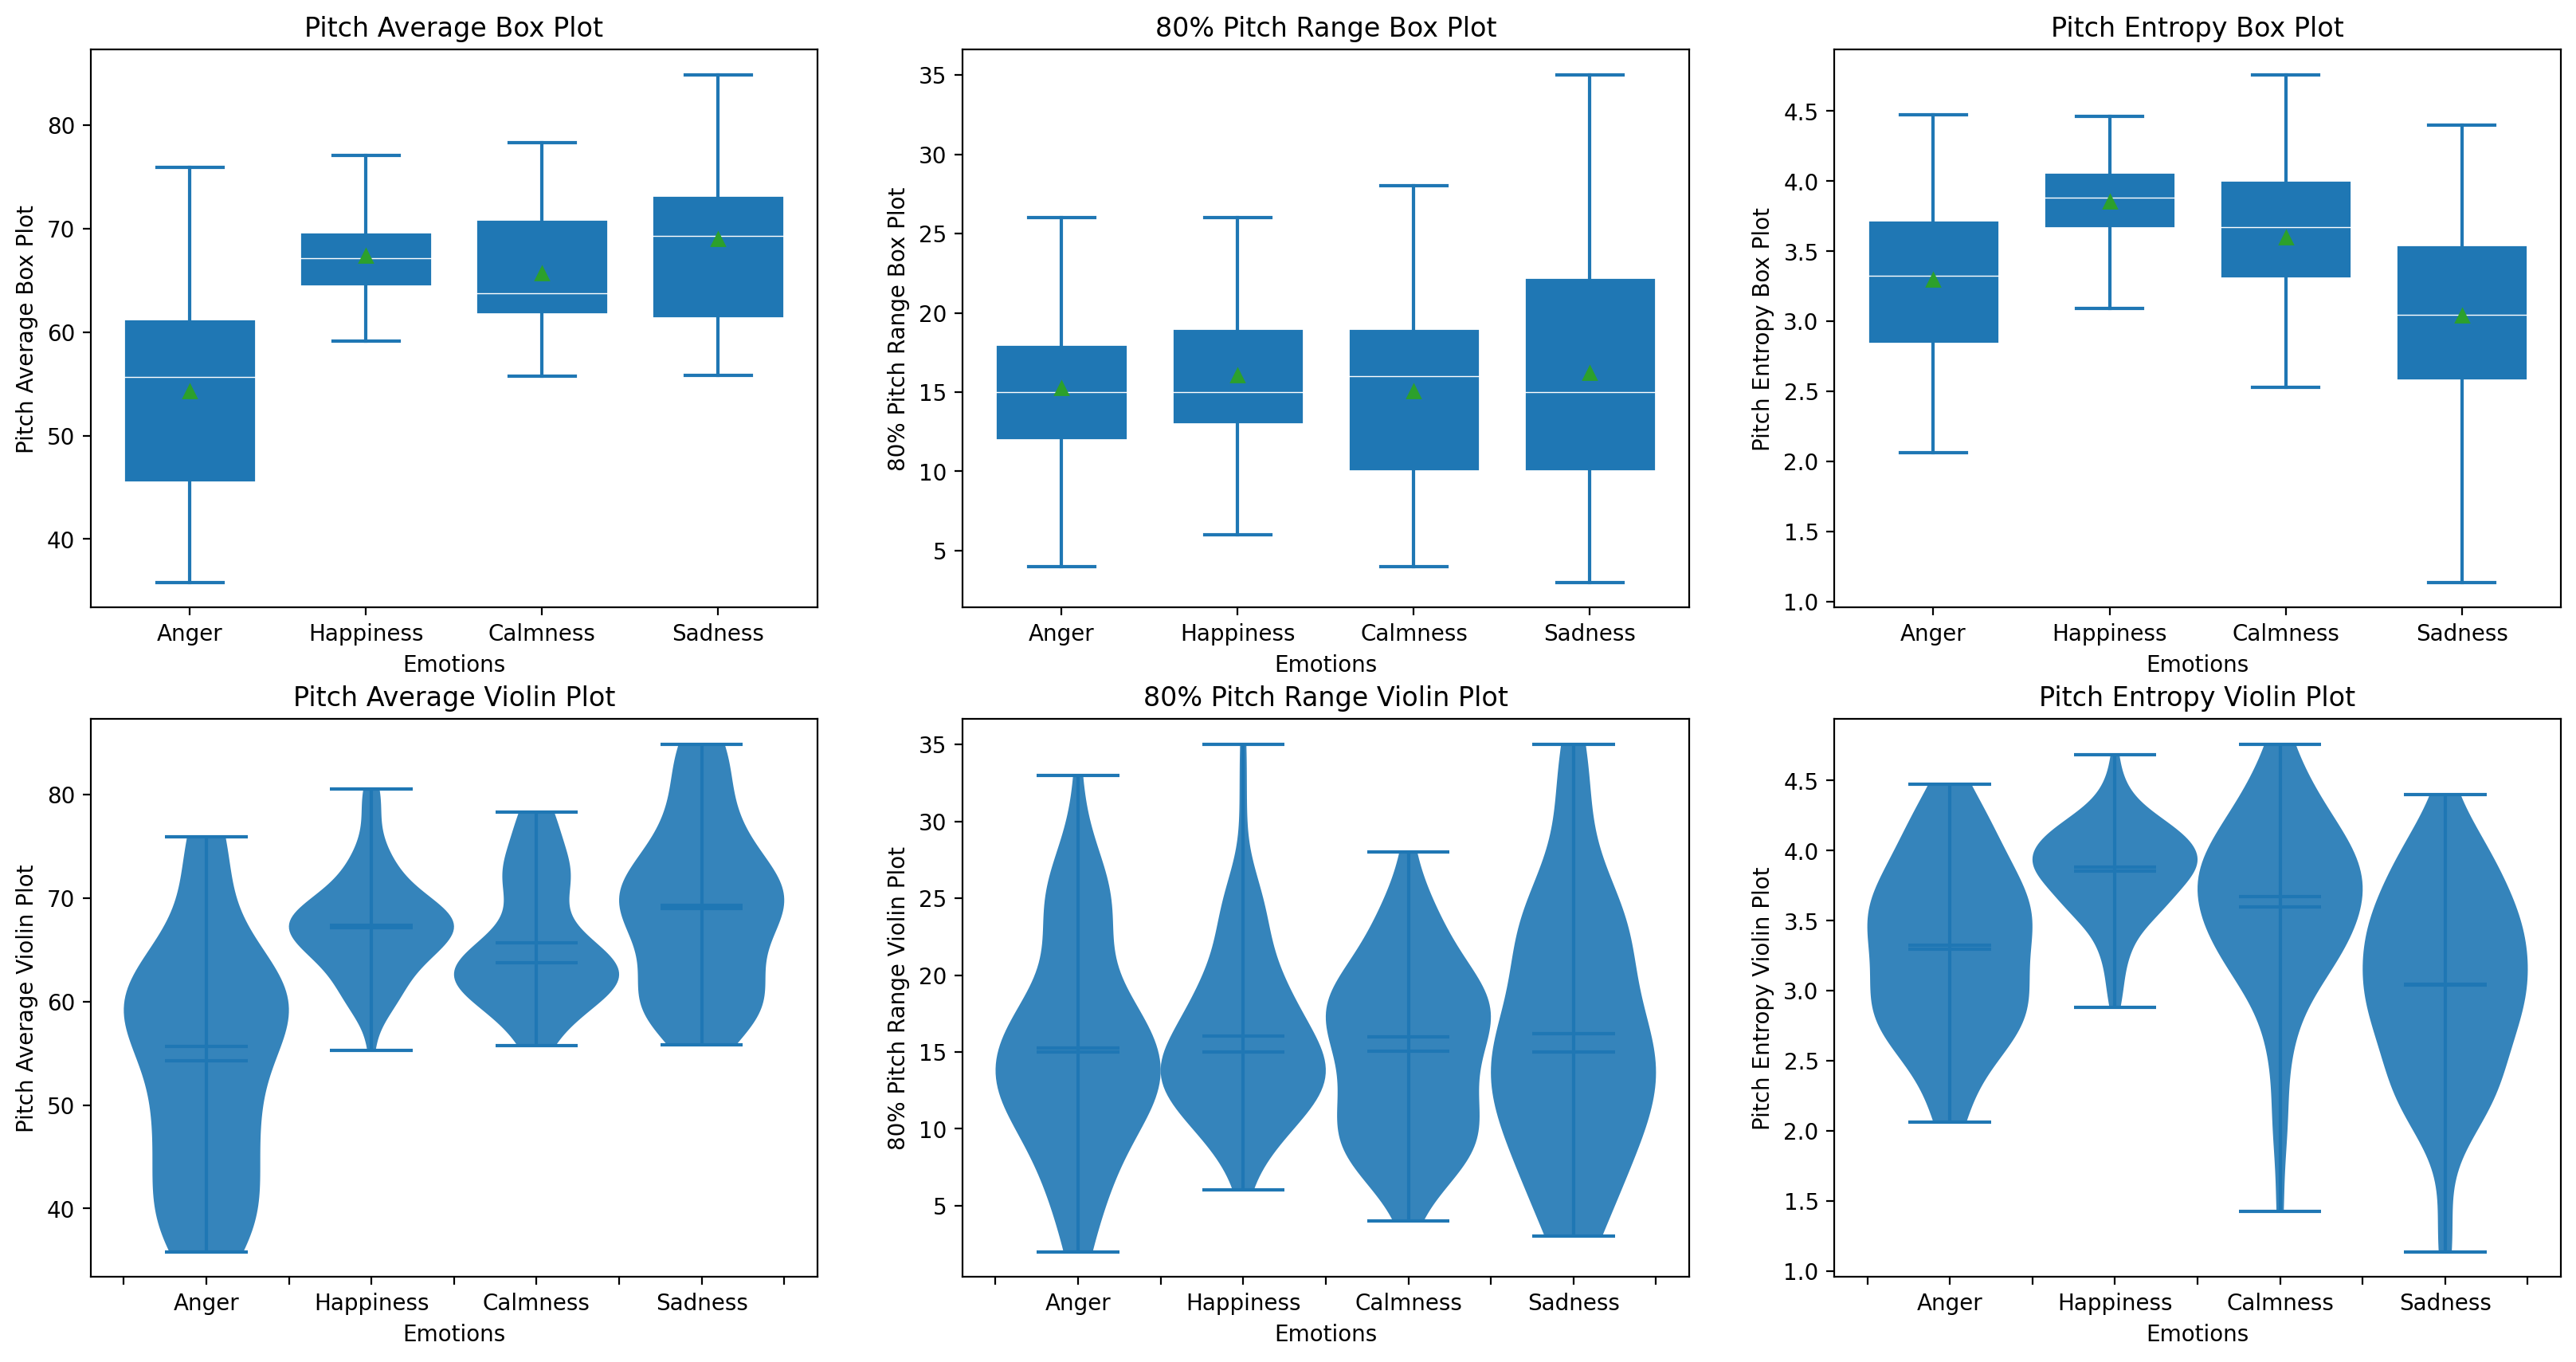

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 0], vp = box_plot(ax[0, 0], points, 'Pitch Average Box Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['80%_pitch_range']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 1], vp = box_plot(ax[0, 1], points, '80% Pitch Range Box Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_entropy']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 2], vp = box_plot(ax[0, 2], points, 'Pitch Entropy Box Plot')




# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_avg']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 0], vp = violin_plot(ax[1, 0], points, 'Pitch Average Violin Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['80%_pitch_range']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 1], vp = violin_plot(ax[1, 1], points, '80% Pitch Range Violin Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_entropy']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 2], vp = violin_plot(ax[1, 2], points, 'Pitch Entropy Violin Plot')

plt.show()

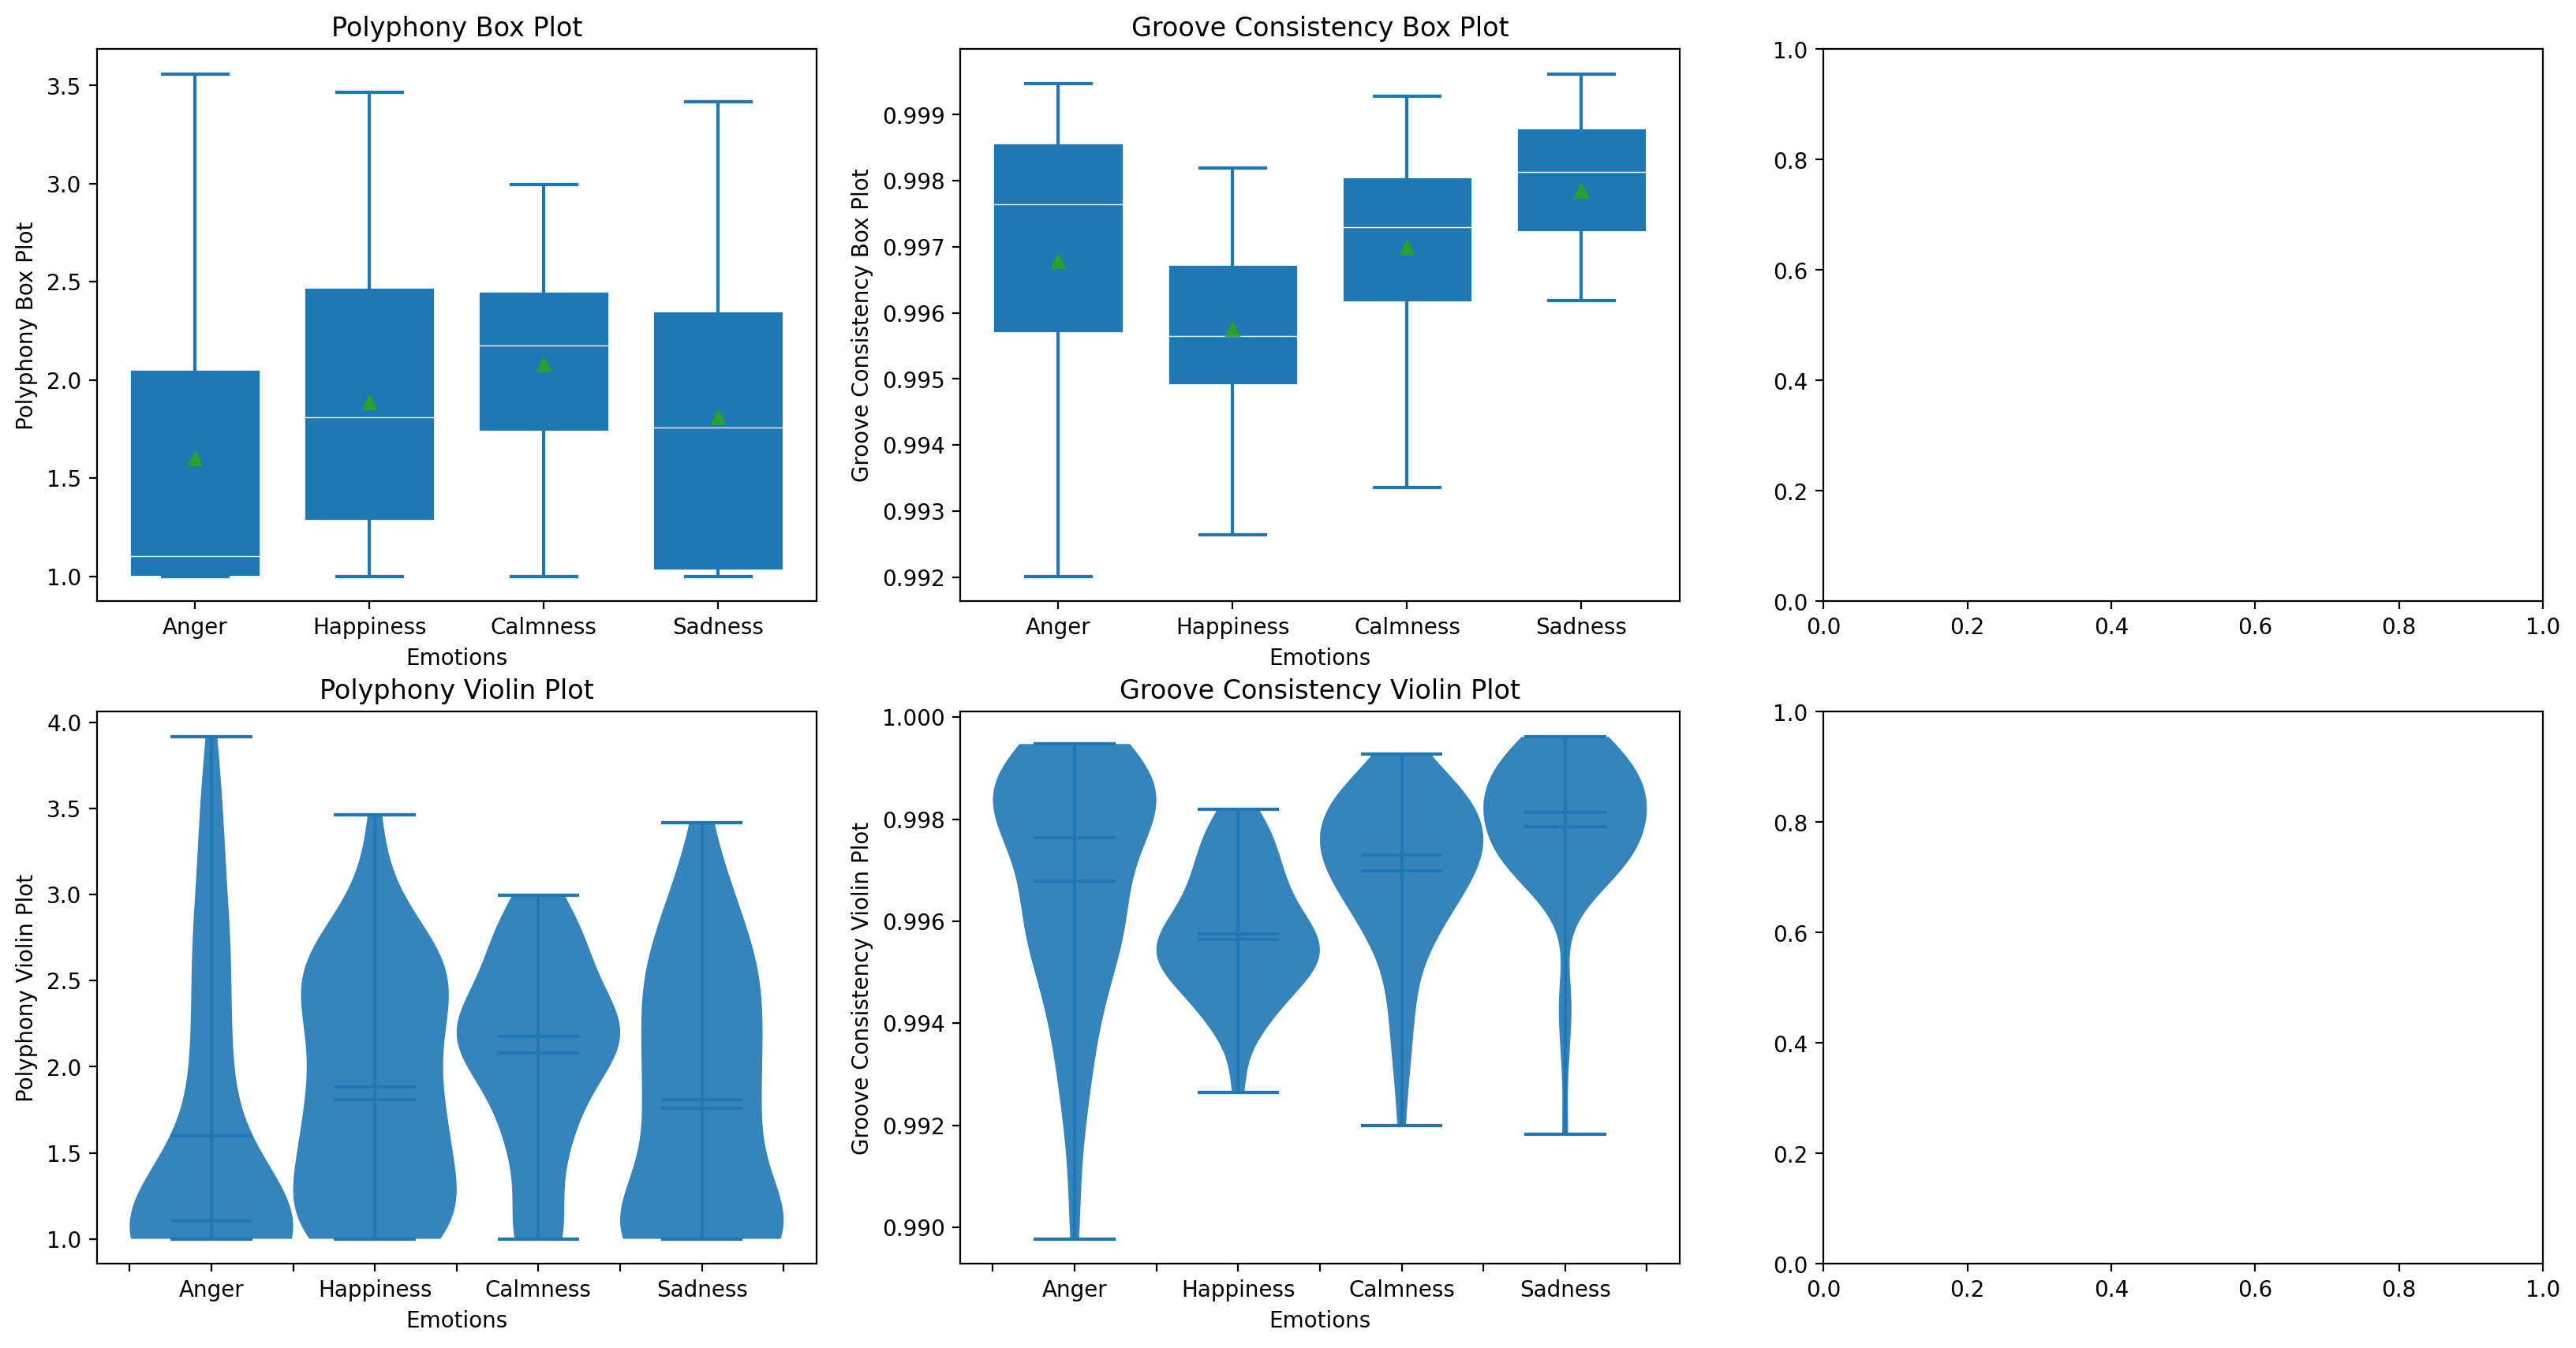

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['polyphony']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 0], vp = box_plot(ax[0, 0], points, 'Polyphony Box Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['groove_consistency']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 1], vp = box_plot(ax[0, 1], points, 'Groove Consistency Box Plot')


# # Note velocity average
# angry = []
# happiness = []
# calmness = []
# sadness = []

# for midi in midi_data_list:
#   num = midi['pitch_entropy']
#   if (midi['emotion'] == 'Angry'):
#     angry.append(num)
#   elif (midi['emotion'] == 'Happiness'):
#     happiness.append(num)
#   elif (midi['emotion'] == 'Calmness'):
#     calmness.append(num)
#   elif (midi['emotion'] == 'Sadness'):
#     sadness.append(num)

# points = (angry, happiness, calmness, sadness)
# ax[0, 2], vp = box_plot(ax[0, 2], points, 'Pitch Entropy Box Plot')




# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['polyphony']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 0], vp = violin_plot(ax[1, 0], points, 'Polyphony Violin Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['groove_consistency']
  if (midi['emotion'] == 'Anger'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 1], vp = violin_plot(ax[1, 1], points, 'Groove Consistency Violin Plot')


# # Note velocity average
# angry = []
# happiness = []
# calmness = []
# sadness = []

# for midi in midi_data_list:
#   num = midi['pitch_entropy']
#   if (midi['emotion'] == 'Angry'):
#     angry.append(num)
#   elif (midi['emotion'] == 'Happiness'):
#     happiness.append(num)
#   elif (midi['emotion'] == 'Calmness'):
#     calmness.append(num)
#   elif (midi['emotion'] == 'Sadness'):
#     sadness.append(num)

# points = (angry, happiness, calmness, sadness)
# ax[1, 2], vp = violin_plot(ax[1, 2], points, 'Pitch Entropy Violin Plot')

plt.show()